# IOT internship for HAR - Deepak Thandra

In [35]:
import os
import numpy as np
import pandas as pd


In [36]:
# Renaming file names to access in sequence

import glob, os
os.chdir("C://Users/babi/1Acode/parag/chest")
i=0
for file in glob.glob("*.csv"):
    
    pid=file[0:-4]
    if len(pid)==1 :
        os.rename(file,"0"+file)
 

In [37]:
# Reading data from files and appending in a dataframe

for file in glob.glob("*.csv"):

    pid=file[0:-4]
    dft=pd.read_csv(file,header=None,names=["sid","acc_x","acc_y","acc_z","label"])
    dft["pid"]=pid
    dft.count()

    if i==0 :
        df=dft
    else :
        df=df.append(dft,ignore_index=True)
    i=i+1
    
    del dft
    
df["sid"]=df["sid"].astype(int)
df["pid"]=df["pid"].astype(int)

In [38]:
df.count()

sid      1926896
acc_x    1926896
acc_y    1926896
acc_z    1926896
label    1926896
pid      1926896
dtype: int64

In [39]:
df.dtypes

sid      int32
acc_x    int64
acc_y    int64
acc_z    int64
label    int64
pid      int32
dtype: object

In [40]:
df.head()

,sid,acc_x,acc_y,acc_z,label,pid
0,0,1502,2215,2153,1,1
1,1,1667,2072,2047,1,1
2,2,1611,1957,1906,1,1
3,3,1601,1939,1831,1,1
4,4,1643,1965,1879,1,1


In [41]:
df.tail()

,sid,acc_x,acc_y,acc_z,label,pid
1926891,103500,2043,2539,1990,7,15
1926892,103500,2036,2508,1976,7,15
1926893,103500,2025,2520,1991,7,15
1926894,103500,2009,2546,2007,7,15
1926895,103500,1999,2532,1996,0,15


In [42]:
df.label.value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: label, dtype: int64

In [43]:
len(df)

1926896

In [44]:
df=df[df.label!=0]



In [45]:
len(df)

1923177

In [46]:
# We have label 0 for all the persons data as the last record 
# Forpersons 2, 6, 8,9 there are labels in the midde rows also 
# Thought these are for idle position  rows with label 0

a=df.loc[df.label==0]
a[["label","pid"]].groupby(["pid",'label'])['label'].count()



Series([], Name: label, dtype: int64)

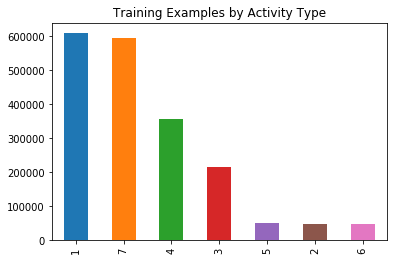

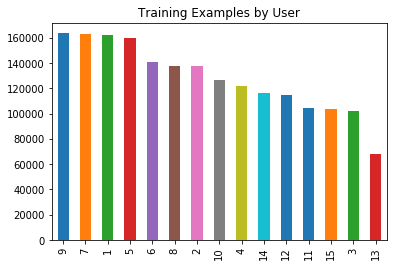

In [47]:
# Understanding distribution of data for various activities and persons
# We see class imbalance for some activities

from matplotlib import pyplot as plt
%matplotlib inline


df['label'].value_counts().plot(kind='bar',title='Training Examples by Activity Type')
plt.show()
df['pid'].value_counts().plot(kind='bar',title='Training Examples by User')
plt.show()


In [48]:
from sklearn.preprocessing import StandardScaler

std_scale=StandardScaler().fit(df.iloc[: ,1:4])
df.iloc[: ,1:4]=std_scale.transform(df.iloc[:,1:4])


In [49]:
df.iloc[1:4 ,1:4].head()

,acc_x,acc_y,acc_z
1,-2.878360,-3.096472,0.809722
2,-3.381321,-4.244054,-0.682480
3,-3.471135,-4.423675,-1.476205


In [50]:
df.head()

,sid,acc_x,acc_y,acc_z,label,pid
0,0,-4.360297,-1.669479,1.931520,1,1
1,1,-2.878360,-3.096472,0.809722,1,1
2,2,-3.381321,-4.244054,-0.682480,1,1
3,3,-3.471135,-4.423675,-1.476205,1,1
4,4,-3.093915,-4.164222,-0.968221,1,1


# Sliding Window Approach

In [13]:
# Data windows are created with timesteps of 128
# Overlapping is not considered because it may lead to overfitting .

'''
for i in range(0,len(X_train)-128,128) :
    
    if(i==0):
        trainx=X_train[i:i+128]
    else :
        trainx=np.append(trainx,X_train[i:i+128],axis=0)
        
'''    
    

'\nfor i in range(0,len(X_train)-128,128) :\n    \n    if(i==0):\n        trainx=X_train[i:i+128]\n    else :\n        trainx=np.append(trainx,X_train[i:i+128],axis=0)\n        \n'

In [51]:
from statistics import mode

N_TIME_STEPS = 127
N_FEATURES = 3
step = 52
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['acc_x'].values[i: i + N_TIME_STEPS]
    ys = df['acc_y'].values[i: i + N_TIME_STEPS]
    zs = df['acc_z'].values[i: i + N_TIME_STEPS]
    label = mode(df['label'][i: i + N_TIME_STEPS])
    segments.append([xs, ys, zs])
    labels.append(label)


In [52]:
np.unique(np.array(labels))

array([1, 2, 3, 4, 5, 6, 7])

In [53]:
np.array(segments).shape


(36982, 3, 127)

In [54]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)


In [55]:
reshaped_segments.shape


(36982, 127, 3)

In [56]:
labels[0:5]


array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
labels.shape

(36982, 7)

In [58]:
from sklearn.model_selection import train_test_split

RANDOM_SEED=42

X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)


In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D,LSTM
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.regularizers import l2


C:\Users\babi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [61]:
n_timesteps,n_features=127,3
epochs,batch_size=10,64
n_outputs=7

model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(n_timesteps,n_features)))
#model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
#model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size ,validation_split=0.2)
# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)


Train on 23668 samples, validate on 5917 samples
Epoch 1/10
23668/23668 [==============================] - 203s 9ms/step - loss: 1.4190 - acc: 0.4485 - val_loss: 1.1862 - val_acc: 0.5673
Epoch 2/10
23668/23668 [==============================] - 197s 8ms/step - loss: 1.1395 - acc: 0.6089 - val_loss: 0.9669 - val_acc: 0.6868
Epoch 3/10
23668/23668 [==============================] - 194s 8ms/step - loss: 0.9107 - acc: 0.7056 - val_loss: 0.8598 - val_acc: 0.7235
Epoch 4/10
23668/23668 [==============================] - 193s 8ms/step - loss: 0.8544 - acc: 0.7206 - val_loss: 0.8244 - val_acc: 0.7313
Epoch 5/10
23668/23668 [==============================] - 191s 8ms/step - loss: 0.7710 - acc: 0.7456 - val_loss: 0.7552 - val_acc: 0.7455
Epoch 6/10
23668/23668 [==============================] - 192s 8ms/step - loss: 0.7457 - acc: 0.7502 - val_loss: 0.7795 - val_acc: 0.7399
Epoch 7/10
23668/23668 [==============================] - 193s 8ms/step - loss: 0.7040 - acc: 0.7650 - val_loss: 0.7219 - v

In [62]:
accuracy

0.7677436799991448

In [57]:
n_timesteps,n_features=199,3
epochs,batch_size=10,64
n_outputs=8

model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(n_timesteps,n_features)))
#model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
#model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size ,validation_split=0.2)
# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)


Train on 61654 samples, validate on 15414 samples
Epoch 1/10
61654/61654 [==============================] - 888s 14ms/step - loss: 1.3253 - acc: 0.5007 - val_loss: 1.0762 - val_acc: 0.6238
Epoch 2/10
61654/61654 [==============================] - 912s 15ms/step - loss: 1.0649 - acc: 0.6379 - val_loss: 0.9739 - val_acc: 0.6752
Epoch 3/10
61654/61654 [==============================] - 910s 15ms/step - loss: 0.9812 - acc: 0.6732 - val_loss: 0.9664 - val_acc: 0.6787
Epoch 4/10
61654/61654 [==============================] - 884s 14ms/step - loss: 0.8831 - acc: 0.7097 - val_loss: 0.7837 - val_acc: 0.7404
Epoch 5/10
61654/61654 [==============================] - 882s 14ms/step - loss: 0.7545 - acc: 0.7459 - val_loss: 0.7362 - val_acc: 0.7474
Epoch 6/10
61654/61654 [==============================] - 885s 14ms/step - loss: 0.7585 - acc: 0.7443 - val_loss: 0.7376 - val_acc: 0.7471
Epoch 7/10
61654/61654 [==============================] - 886s 14ms/step - loss: 0.6751 - acc: 0.7731 - val_loss: 0.

In [58]:
accuracy

0.8113354440265534

In [27]:
# Building the model using LSTM

n_timesteps,n_features=125,3
epochs,batch_size=10,64
n_outputs=8

model = Sequential()
model.add(LSTM(256, input_shape=(n_timesteps,n_features)))
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))



In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size ,validation_split=0.2)
# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)


Train on 9865 samples, validate on 2467 samples
Epoch 1/10
9865/9865 [==============================] - 130s 13ms/step - loss: 1.5010 - acc: 0.4229 - val_loss: 1.4387 - val_acc: 0.4248
Epoch 2/10
9865/9865 [==============================] - 131s 13ms/step - loss: 1.3743 - acc: 0.4953 - val_loss: 1.2532 - val_acc: 0.5565
Epoch 3/10
9865/9865 [==============================] - 125s 13ms/step - loss: 1.1484 - acc: 0.6121 - val_loss: 1.0729 - val_acc: 0.6267
Epoch 4/10
9865/9865 [==============================] - 123s 12ms/step - loss: 1.1196 - acc: 0.6303 - val_loss: 1.0696 - val_acc: 0.6267
Epoch 5/10
9865/9865 [==============================] - 123s 12ms/step - loss: 1.0794 - acc: 0.6417 - val_loss: 1.0700 - val_acc: 0.6246
Epoch 6/10
9865/9865 [==============================] - 122s 12ms/step - loss: 1.0594 - acc: 0.6447 - val_loss: 1.0447 - val_acc: 0.6405
Epoch 7/10
9865/9865 [==============================] - 122s 12ms/step - loss: 1.0543 - acc: 0.6570 - val_loss: 1.0155 - val_acc: 

In [29]:
print(accuracy)

0.6772624068046753


In [32]:
test_classes_lstm = model.predict_classes(testx)
test_classes_lstm.shape

(2244,)

Have implemented sliding window with LSTM architecture.
Other alterative approches are :

1. Hand crafting features and applying models. Deep learning models perform better than this.
2. CNN 
3. Combination of CNN- LSTM
4. ConvLSTM
